<a href="https://colab.research.google.com/github/mushamvineeth/Vineeth_INFO5731_Spring2021/blob/main/In_Class_exercises_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In class exercise 10 (20 points in total, 4/16/2021)

The purpose of the exercise is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K means, 
DBSCAN,
Hierarchical clustering. 

You can refer to of the codes from  the follwing link below. 
https://www.kaggle.com/karthik3890/text-clustering 
    

In [24]:
#Write your code here.


import pandas as pd
import gensim
Data_frame=pd.read_csv("/content/Amazon_Unlocked_Mobile.csv")
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from textblob import Word
nltk.download('wordnet')
from nltk.stem import PorterStemmer
st = PorterStemmer()
Data_frame = Data_frame[Data_frame['Reviews'].notnull()]
stop = stopwords.words('english')
Data_frame['after_punct_less'] = Data_frame['Reviews'].str.replace('[^\w\s].#','')
Data_frame['after_rm_stopwords'] =Data_frame['after_punct_less'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
Data_frame['after_numerics']=Data_frame['after_rm_stopwords'].str.replace('[0-9]','')
Data_frame['after_lowercasing'] =Data_frame['after_numerics'].apply(lambda x: " ".join(x.lower() for x in x.split()))

Data_frame['after_stemming']=Data_frame['after_lowercasing'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
Data_frame['cleaned_text'] = Data_frame['after_stemming'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [25]:
Data_frame['cleaned_text'].head()

0    i feel lucki found use (phone u & use hard all...
1    nice phone, nice grade pantach revue. veri cle...
2                                            veri plea
3      it work good goe slow sometim good phone i love
4    great phone replac lost phone. the thing volum...
Name: cleaned_text, dtype: object

In [26]:
Data_frame_1=(df.sample(n=4000)).reset_index()

In [28]:

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(df_1['cleaned_text'].values)
tfidf.shape

(4000, 7245)

In [29]:
from sklearn.cluster import KMeans
Model_tf = KMeans(n_clusters = 5, n_jobs = -1,random_state=99)
Model_tf.fit(tfidf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=99, tol=0.0001, verbose=0)

In [31]:
labels_tf = Model_tf.labels_
cluster_center_tf=Model_tf.cluster_centers_

In [32]:
terms_1 = tfidf_vect.get_feature_names()
terms_1[1:5]
Data_frame1 = df_1
Data_frame1['Tfidf Clus Label'] = model_tf.labels_
Data_frame1.head(5)

,index,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,after_punct_less,after_rm_stopwords,after_numerics,after_lowercasing,after_stemming,cleaned_text,Tfidf Clus Label,AVG-W2V Clus Label
0,106512,BLU Advance 4.0L Unlocked Smartphone -US GSM -...,BLU,57.29,5,Good,0.0,Good,Good,Good,good,good,good,1,4
1,214252,LG G Flex2 LS996 16GB Sprint (Locked) No-Contr...,LG,169.99,3,So far so great. Terrific condition. Had plast...,1.0,So far so great. Terrific condition. Had plast...,So far great. Terrific condition. Had plastics...,So far great. Terrific condition. Had plastics...,so far great. terrific condition. had plastics...,so far great. terrif condition. had plastic bo...,so far great. terrif condition. had plastic bo...,0,0
2,370407,Samsung Galaxy S7 Edge Duos SM-G935FD 32GB Dua...,Samsung,590.49,4,I FIRST EXPERIENCE ONLINE PHONE ORDERBUT REALY...,1.0,I FIRST EXPERIENCE ONLINE PHONE ORDERBUT REALY...,I FIRST EXPERIENCE ONLINE PHONE ORDERBUT REALY...,I FIRST EXPERIENCE ONLINE PHONE ORDERBUT REALY...,i first experience online phone orderbut realy...,i first experi onlin phone orderbut reali good...,i first experi onlin phone orderbut reali good...,0,0
3,225141,"LG Google Nexus 5 (D821) 16GB , 3G, 8MP, KitKa...",LG,257.72,5,"Great smartphone! I use Android 5.1, and don't...",0.0,"Great smartphone! I use Android 5.1, and don't...","Great smartphone! I use Android 5.1, problems....","Great smartphone! I use Android ., problems. T...","great smartphone! i use android ., problems. t...","great smartphone! i use android ., problems. t...","great smartphone! i use android ., problems. t...",0,6
4,158421,BLU Tank II T193 Unlocked GSM Dual-SIM Cell Ph...,BLU,20.99,5,excelente,0.0,excelente,excelente,excelente,excelente,excelent,excelent,0,5


In [33]:
df1.groupby(['Tfidf Clus Label'])['cleaned_text'].count()

Tfidf Clus Label
0    3424
1     169
2     118
3     146
4     143
Name: cleaned_text, dtype: int64

In [34]:
print("Top terms per cluster:")
order_centroids = model_tf.cluster_centers_.argsort()[:, ::-1]
for i in range(1,5):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :5]:
        print(' %s' % terms1[ind], end='')
        print()

Top terms per cluster:
Cluster 1: good
 veri
 phone
 price
 product
Cluster 2: excel
 product
 recommend
 phone
 thank
Cluster 3: love
 it
 phone
 my
 daughter
Cluster 4: great
 phone
 product
 work
 price


In [35]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
import gensim

In [37]:
i=0
list_of_sent=[]
for sent in df_1['cleaned_text'].values:
    list_of_sent.append(sent.split())

In [39]:
w2v_model=gensim.models.Word2Vec(list_of_sent,size=100, workers=4)
import numpy as np
sent_vectors = [];
 # The avg-w2v for each sentence/review is stored in this train
for sent in list_of_sent:
 # For each review/sentence
    sent_vec = np.zeros(100)
# As word vectors are of zero length
    cnt_words =0;
# num of words with a valid vector in the sentence/review
    for word in sent:
# For each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
sent_vectors = np.array(sent_vectors)
sent_vectors = np.nan_to_num(sent_vectors)
sent_vectors.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


(4000, 100)

**REFERENCE**:Lower bound function :https://gist.github.com/m00nlight/0f9306b4d4e61ba0195f

In [40]:
# Computing 200th Nearest neighbour distance
minPts = 2 * 100
def lower_bound(nums, target): # This function return the number in the array just greater than or equal to itself.
    l, r = 0, len(nums) - 1
    while l <= r: # Binary searching.
        mid = int(l + (r - l) / 2)
        if nums[mid] >= target:
            r = mid - 1
        else:
            l = mid + 1
    return l

def compute200thnearestneighbour(x, data): # Returns the distance of 200th nearest neighbour.
    dists = []
    for val in data:
        dist = np.sum((x - val) **2 ) # computing distances.
        if(len(dists) == 200 and dists[199] > dist): # If distance is larger than current largest distance found.
            l = int(lower_bound(dists, dist)) # Using the lower bound function to get the right position.
            if l < 200 and l >= 0 and dists[l] > dist:
                dists[l] = dist
        else:
            dists.append(dist)
            dists.sort()
    
    return dists[199]

In [41]:
twohundrethneigh = []
for val in sent_vectors[:1500]:
    twohundrethneigh.append( compute200thnearestneighbour(val, sent_vectors[:1500]) )
twohundrethneigh.sort()

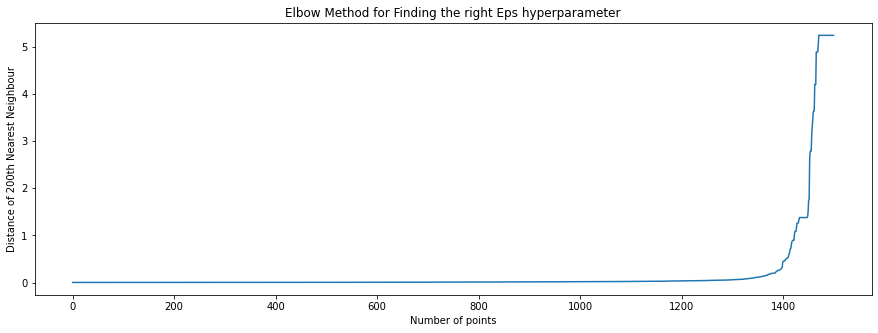

In [42]:
plt.figure(figsize=(15,5))
plt.title("Elbow Method for Finding the right Eps hyperparameter")
plt.plot([x for x in range(len(twohundrethneigh))], twohundrethneigh)
plt.xlabel("Number of points")
plt.ylabel("Distance of 200th Nearest Neighbour")
plt.show()

In [44]:
Model = DBSCAN(eps = 8, min_samples = minPts, n_jobs=-2)
Model.fit(sent_vectors)
df_1['AVG-W2V Clus Label'] = Model.labels_
df_1.head(2)

,index,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,after_punct_less,after_rm_stopwords,after_numerics,after_lowercasing,after_stemming,cleaned_text,Tfidf Clus Label,AVG-W2V Clus Label
0,106512,BLU Advance 4.0L Unlocked Smartphone -US GSM -...,BLU,57.29,5,Good,0.0,Good,Good,Good,good,good,good,1,0
1,214252,LG G Flex2 LS996 16GB Sprint (Locked) No-Contr...,LG,169.99,3,So far so great. Terrific condition. Had plast...,1.0,So far so great. Terrific condition. Had plast...,So far great. Terrific condition. Had plastics...,So far great. Terrific condition. Had plastics...,so far great. terrific condition. had plastics...,so far great. terrif condition. had plastic bo...,so far great. terrif condition. had plastic bo...,0,0


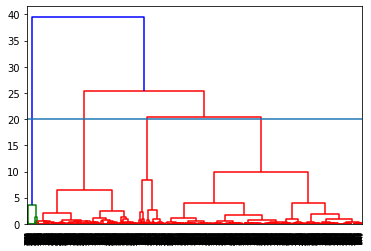

In [45]:
import scipy
from scipy.cluster import hierarchy
dendro=hierarchy.dendrogram(hierarchy.linkage(sent_vectors,method='ward'))
plt.axhline(y=20)

In [46]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')  
Agg=cluster.fit_predict(sent_vectors)

In [47]:
df_1['AVG-W2V Clus Label'] = cluster.labels_
df_1.head(2)
df_1.groupby(['AVG-W2V Clus Label'])['cleaned_text'].count()

AVG-W2V Clus Label
0     932
1    1435
2     218
3     129
4     553
5     100
6     633
Name: cleaned_text, dtype: int64

In [48]:
for i in range(5):
    print("2 reviews of assigned to cluster ", i)
    print("-" * 70)
    print(df_1.iloc[df_1.groupby(['AVG-W2V Clus Label']).groups[i][0]]['cleaned_text'])
    print('\n')
    print(df_1.iloc[df_1.groupby(['AVG-W2V Clus Label']).groups[i][1]]['cleaned_text'])
    print('\n')
    print("_" * 70)

2 reviews of assigned to cluster  0
----------------------------------------------------------------------
so far great. terrif condition. had plastic box charger. phone screen get hot. like super hot. i feel finger tip get warm use min so. kinda weird


i first experi onlin phone orderbut reali good excellent, i m happi with amazon shoping, and i reali like amazon ship order track system.


______________________________________________________________________
2 reviews of assigned to cluster  1
----------------------------------------------------------------------
receiv phone time manner,and happi i got g i order g. final get use phone dead lunch break. batteri life horribl serial number phone match box. these advertis new certainli reburbished, stay away if you want a new phone !


phone good condit batteri lost charg quickly.


______________________________________________________________________
2 reviews of assigned to cluster  2
------------------------------------------------

In one paragraph, please compare K means, DBSCAN and Hierarchical clustering. 


k-values Clustering is a vector quantization method originating in signal processing that aims to partition n observations into k clusters, with each observation belonging to the cluster with the closest mean, which serves as the cluster's prototype. The result shows that k-means are easier to comprehend than DBSCAN. Also missing values in a data set can be controlled by the DBSCAN.There is a lot of noise in hierarchical clustering. We may assume that k-means are the easiest and most optimal solution.







